In [ ]:
import os
import numpy as np
import open3d as o3d
import k3d
import os
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from PIL import Image

data_dir = "/home/daniel/spatial_understanding/benchmarks/openscene/experiments/fusion/truckscenes_openseg/result_eval"
# data_dir = "/home/daniel/spatial_understanding/benchmarks/openscene/experiments/fusion/nuscenes_openseg/result_eval"

for i in range(10):
    file_path = os.path.join(data_dir, f"{i}_fusion.ply")
    pcd = o3d.io.read_point_cloud(file_path)

    points = np.asarray(pcd.points)
    colors = (np.asarray(pcd.colors) * 255).astype(np.uint8)

    # Pack RGB to single 24-bit integer: 0xRRGGBB
    packed_colors = (colors[:, 0].astype(np.uint32) << 16) | \
                    (colors[:, 1].astype(np.uint32) << 8) | \
                    (colors[:, 2].astype(np.uint32))

    # Create K3D plot
    plot = k3d.plot()
    plt_points = k3d.points(
        positions=points.astype(np.float32),
        colors=packed_colors,
        point_size=0.8,
        use_colormap=False  # <- This is key
    )
    plot += plt_points
    plot.display()

    break

In [ ]:


for i in range(9):  # index range matched to existing files
    if i % 20 != 0:
        continue 
    gt_ply_path = os.path.join(data_dir, f"{i}_gt.ply")
    fusion_ply_path = os.path.join(data_dir, f"{i}_fusion.ply")
    gt_img_path = os.path.join(data_dir, f"{i}_labels_gt.jpg")
    fusion_img_path = os.path.join(data_dir, f"{i}_labels_fusion.jpg")

    # Load point clouds
    gt_pcd = o3d.io.read_point_cloud(gt_ply_path)
    fusion_pcd = o3d.io.read_point_cloud(fusion_ply_path)

    gt_points = np.asarray(gt_pcd.points)
    gt_colors = np.asarray(gt_pcd.colors)

    fusion_points = np.asarray(fusion_pcd.points)
    fusion_colors = np.asarray(fusion_pcd.colors)

    # Load images (legends)
    gt_img = np.array(Image.open(gt_img_path))
    fusion_img = np.array(Image.open(fusion_img_path))

    # Create side-by-side plot
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # GT plot
    axes[0].scatter(gt_points[:, 0], gt_points[:, 1], c=gt_colors, s=0.5)
    axes[0].set_title(f"{i}_gt.ply")
    axes[0].axis("equal")
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
        
    inset_gt = axes[0].inset_axes([0.1, -0.35, 0.8, 0.3])  # wider and taller
    inset_gt.imshow(gt_img)
    inset_gt.axis("off")


    # Fusion plot
    axes[1].scatter(fusion_points[:, 0], fusion_points[:, 1], c=fusion_colors, s=0.5)
    axes[1].set_title(f"{i}_fusion.ply")
    axes[1].axis("equal")
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")

    
    inset_fusion = axes[1].inset_axes([0.1, -0.35, 0.8, 0.3])
    inset_fusion.imshow(fusion_img)
    inset_fusion.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
import torch
import os
a = torch.load("/home/daniel/spatial_understanding/benchmarks/openscene/data/nuscenes_multiview_openseg_val/0a0d6b8c2e884134a3b48df43d54c36a.pt")

In [ ]:
print(len(os.listdir("/home/daniel/spatial_understanding/benchmarks/openscene/data/truckscenes_multiview_openseg_val/")))
print(len(os.listdir("/home/daniel/spatial_understanding/benchmarks/openscene/data/truckscenes_3d/val")))

In [ ]:
feat, mask = a['feat'], a['mask_full']
print(feat.shape, mask.shape)

In [ ]:
diri = "/home/daniel/spatial_understanding/benchmarks/openscene/data/truckscenes_multiview_openseg_val/"
patis = [os.path.join(diri, i) for i in os.listdir(diri)]

for pat in patis:
    pici = torch.load(pat)
    feat, mask = pici['feat'], pici['mask_full']
    print(sum(mask), len(mask))
    if sum(mask) == 0:
        print("is zheeeero")


# Visualize network predictions

In [29]:
import os
import numpy as np
import open3d as o3d
import k3d
import os
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
from PIL import Image

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


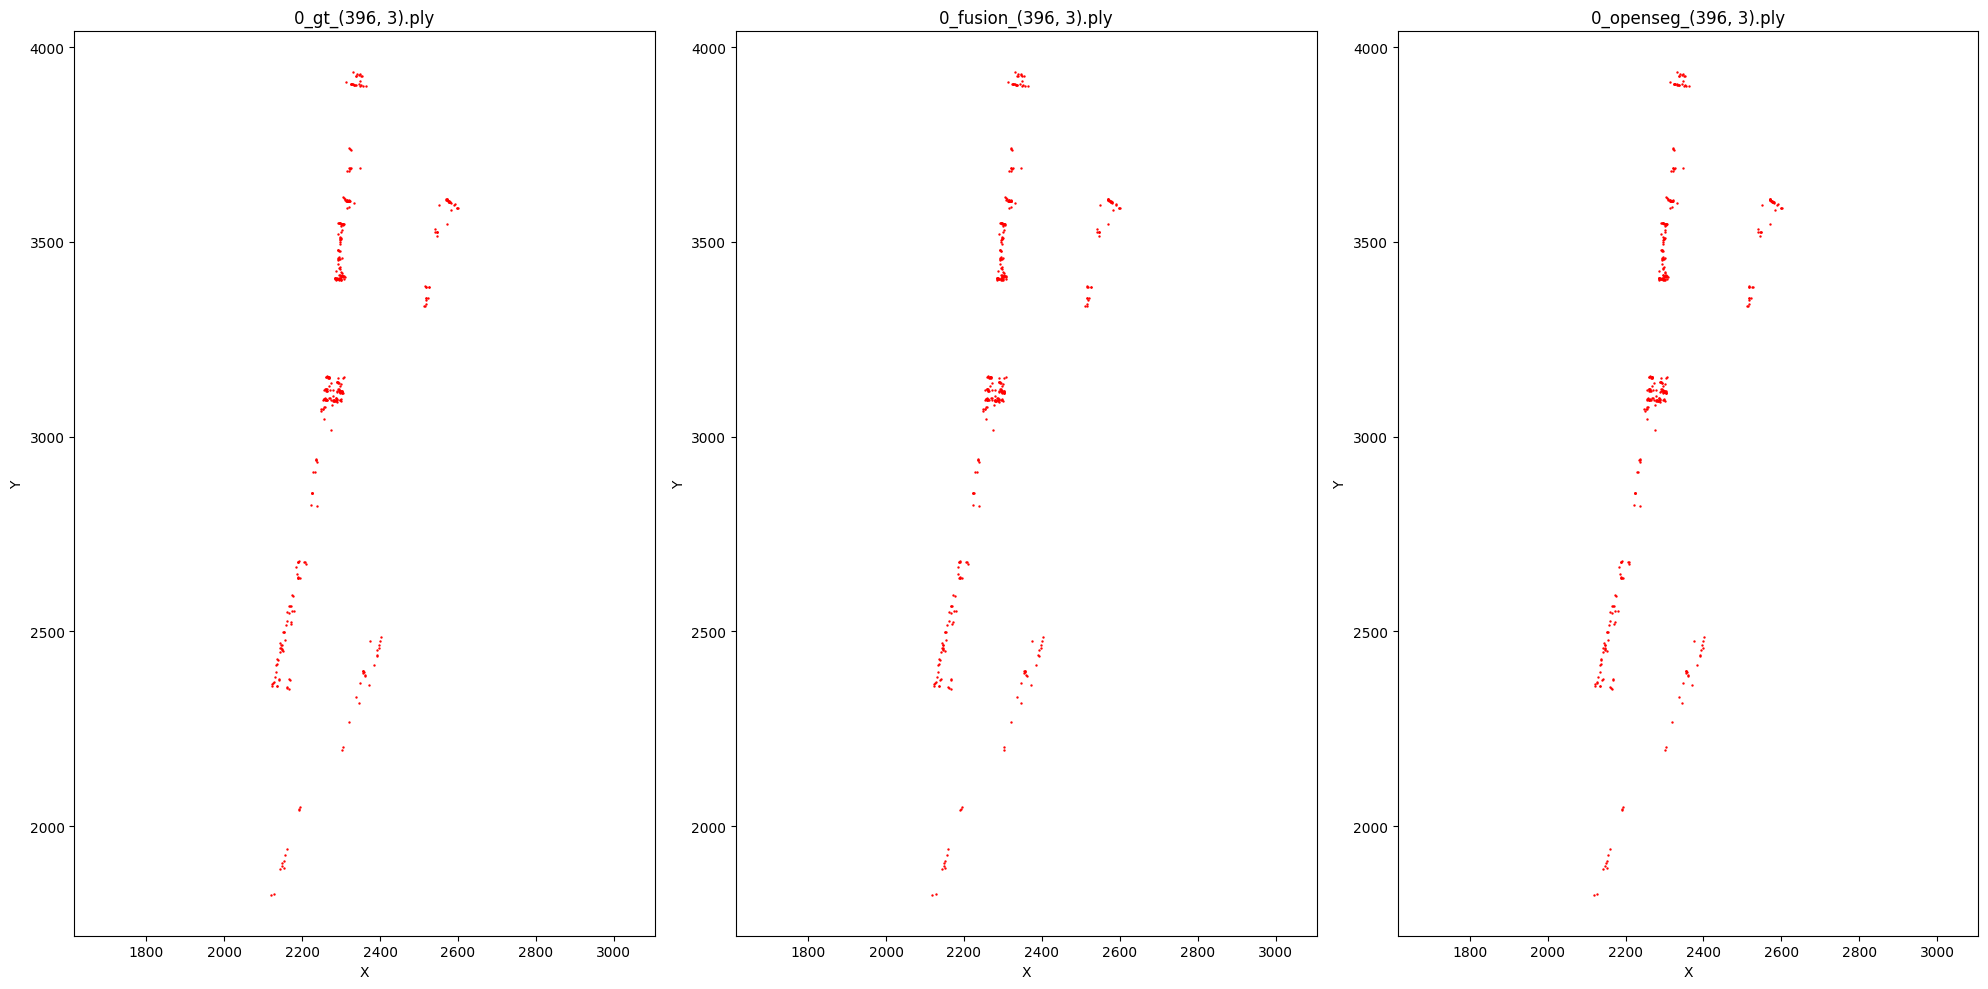

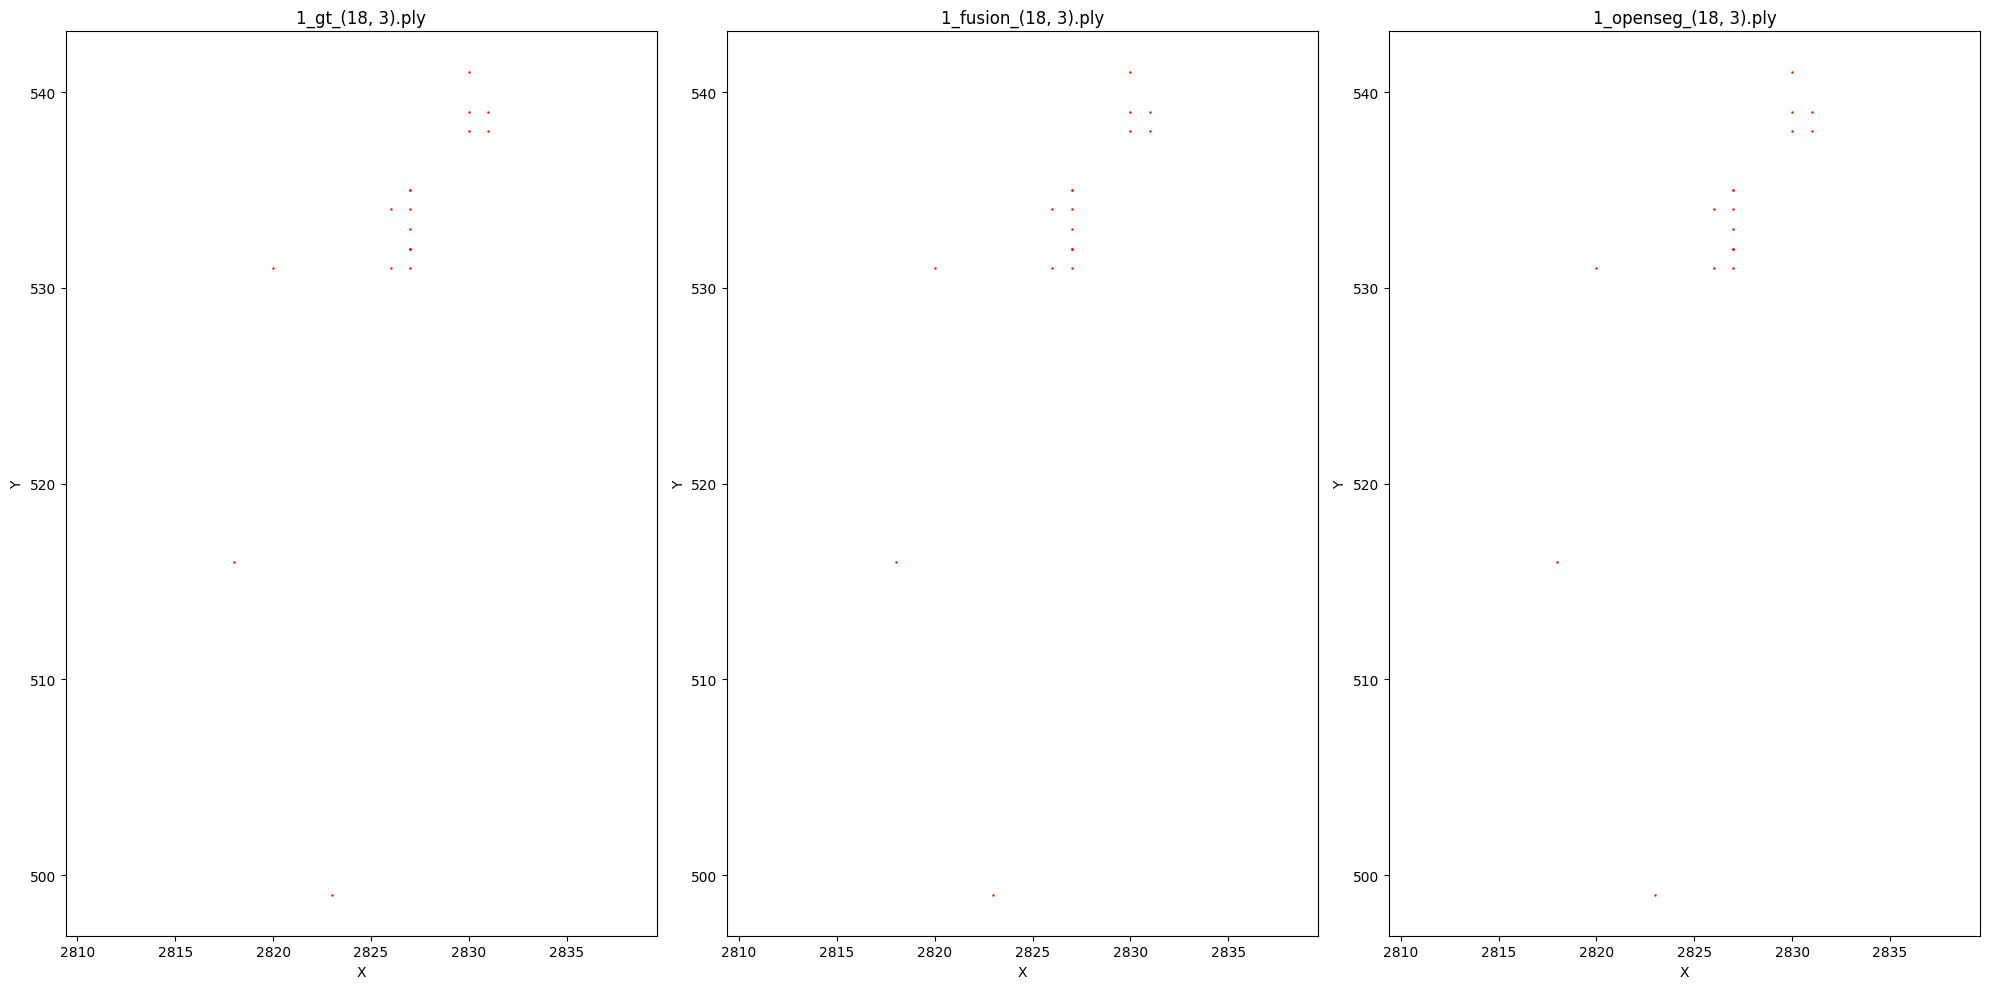

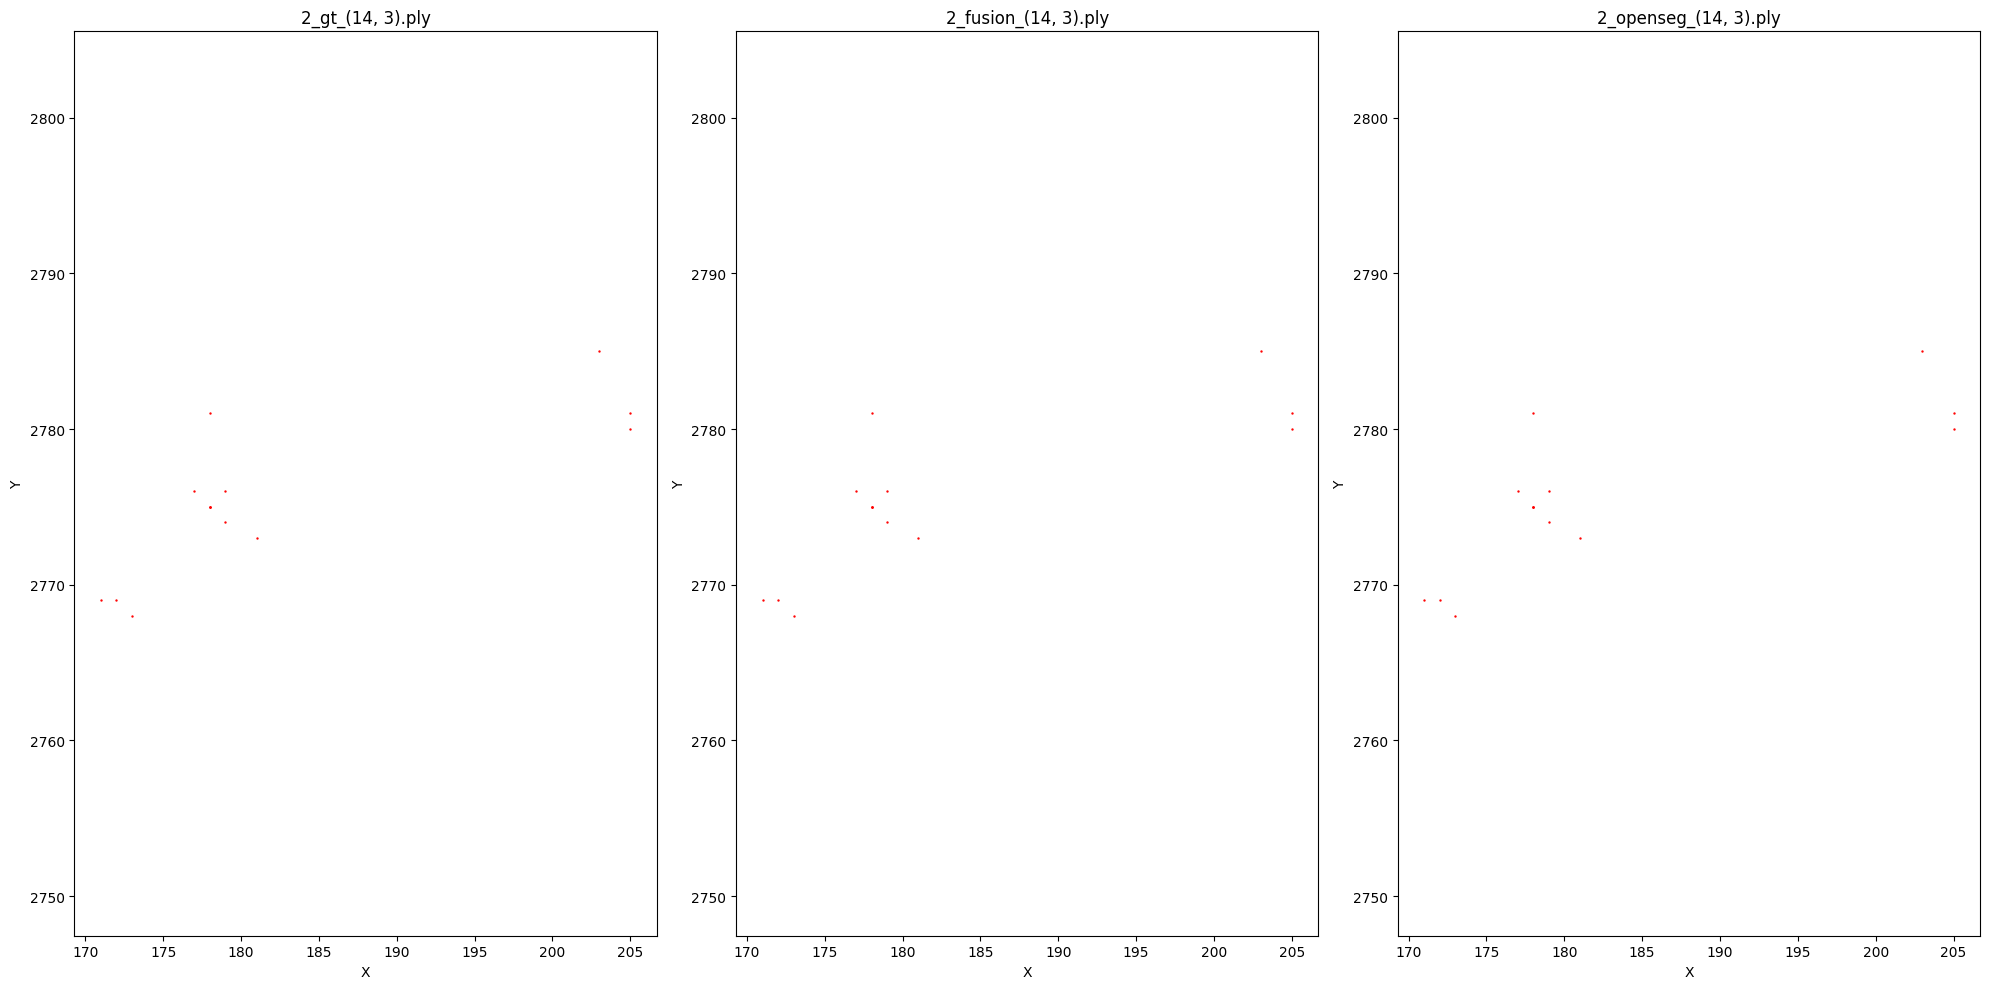

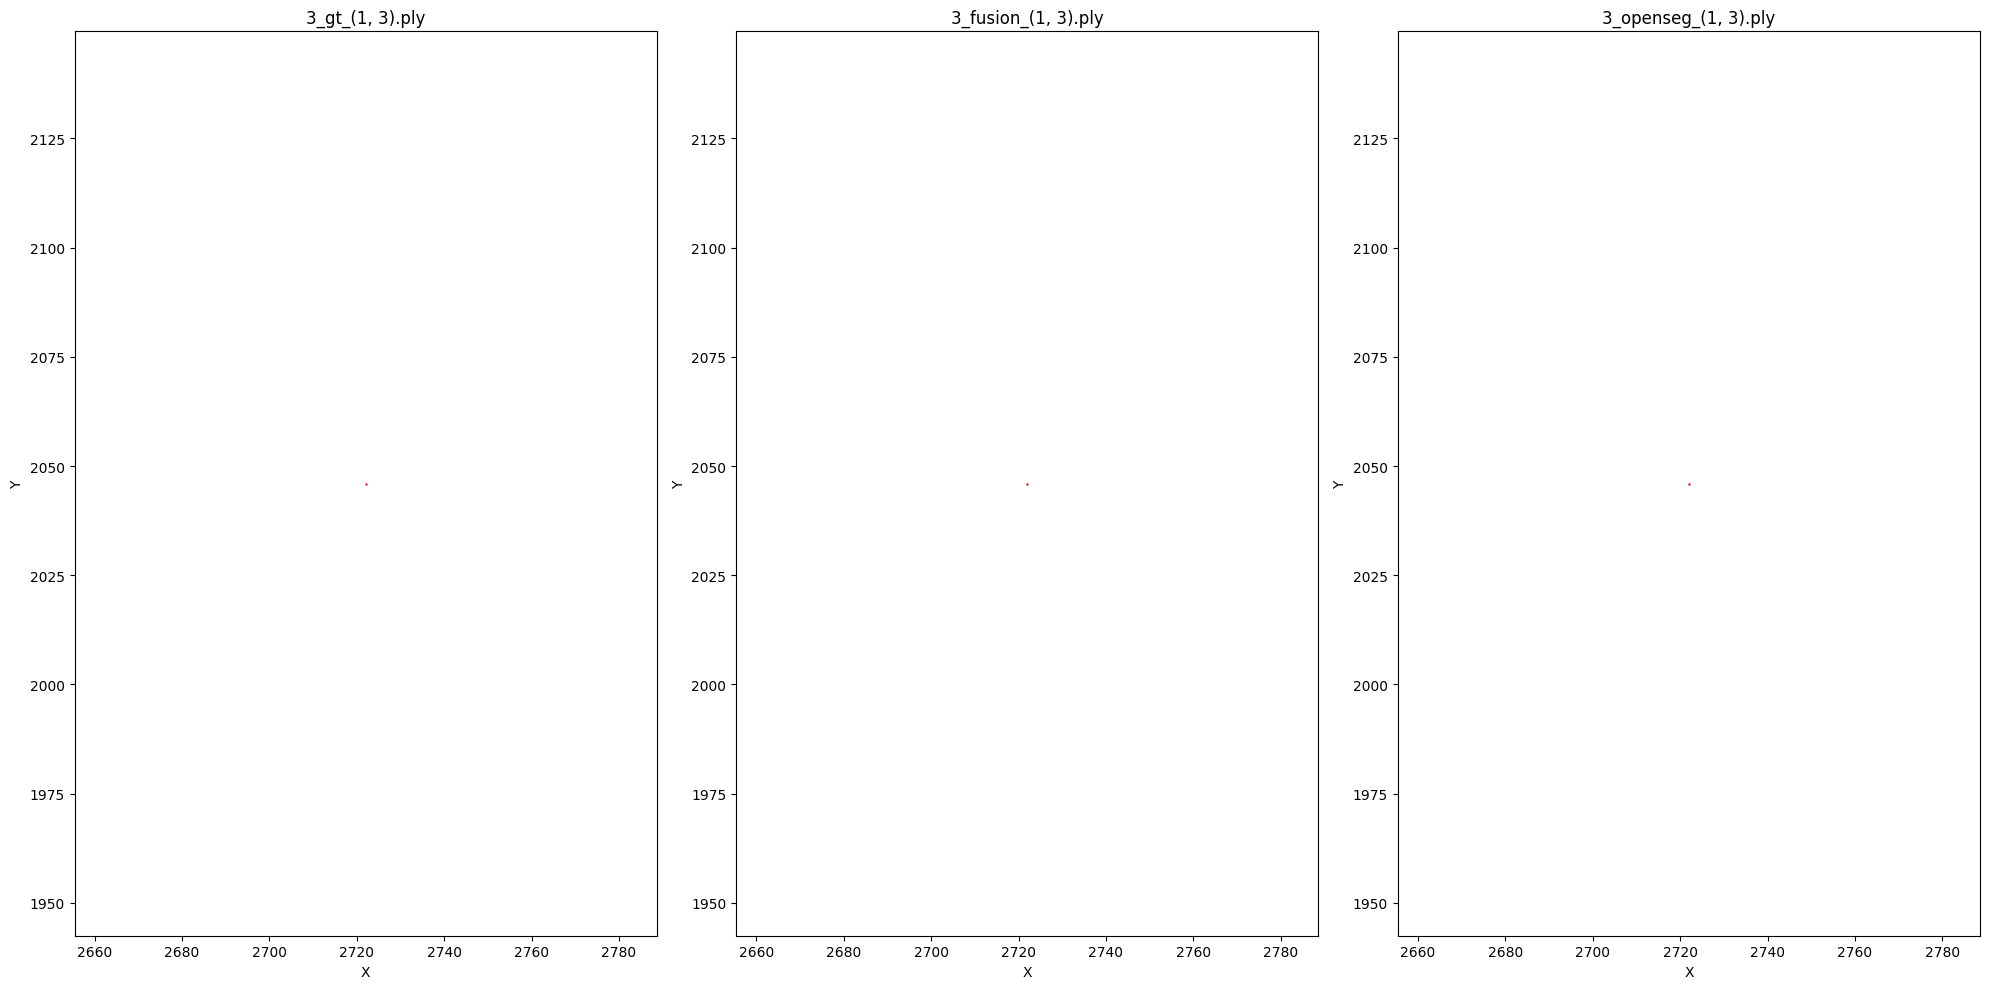

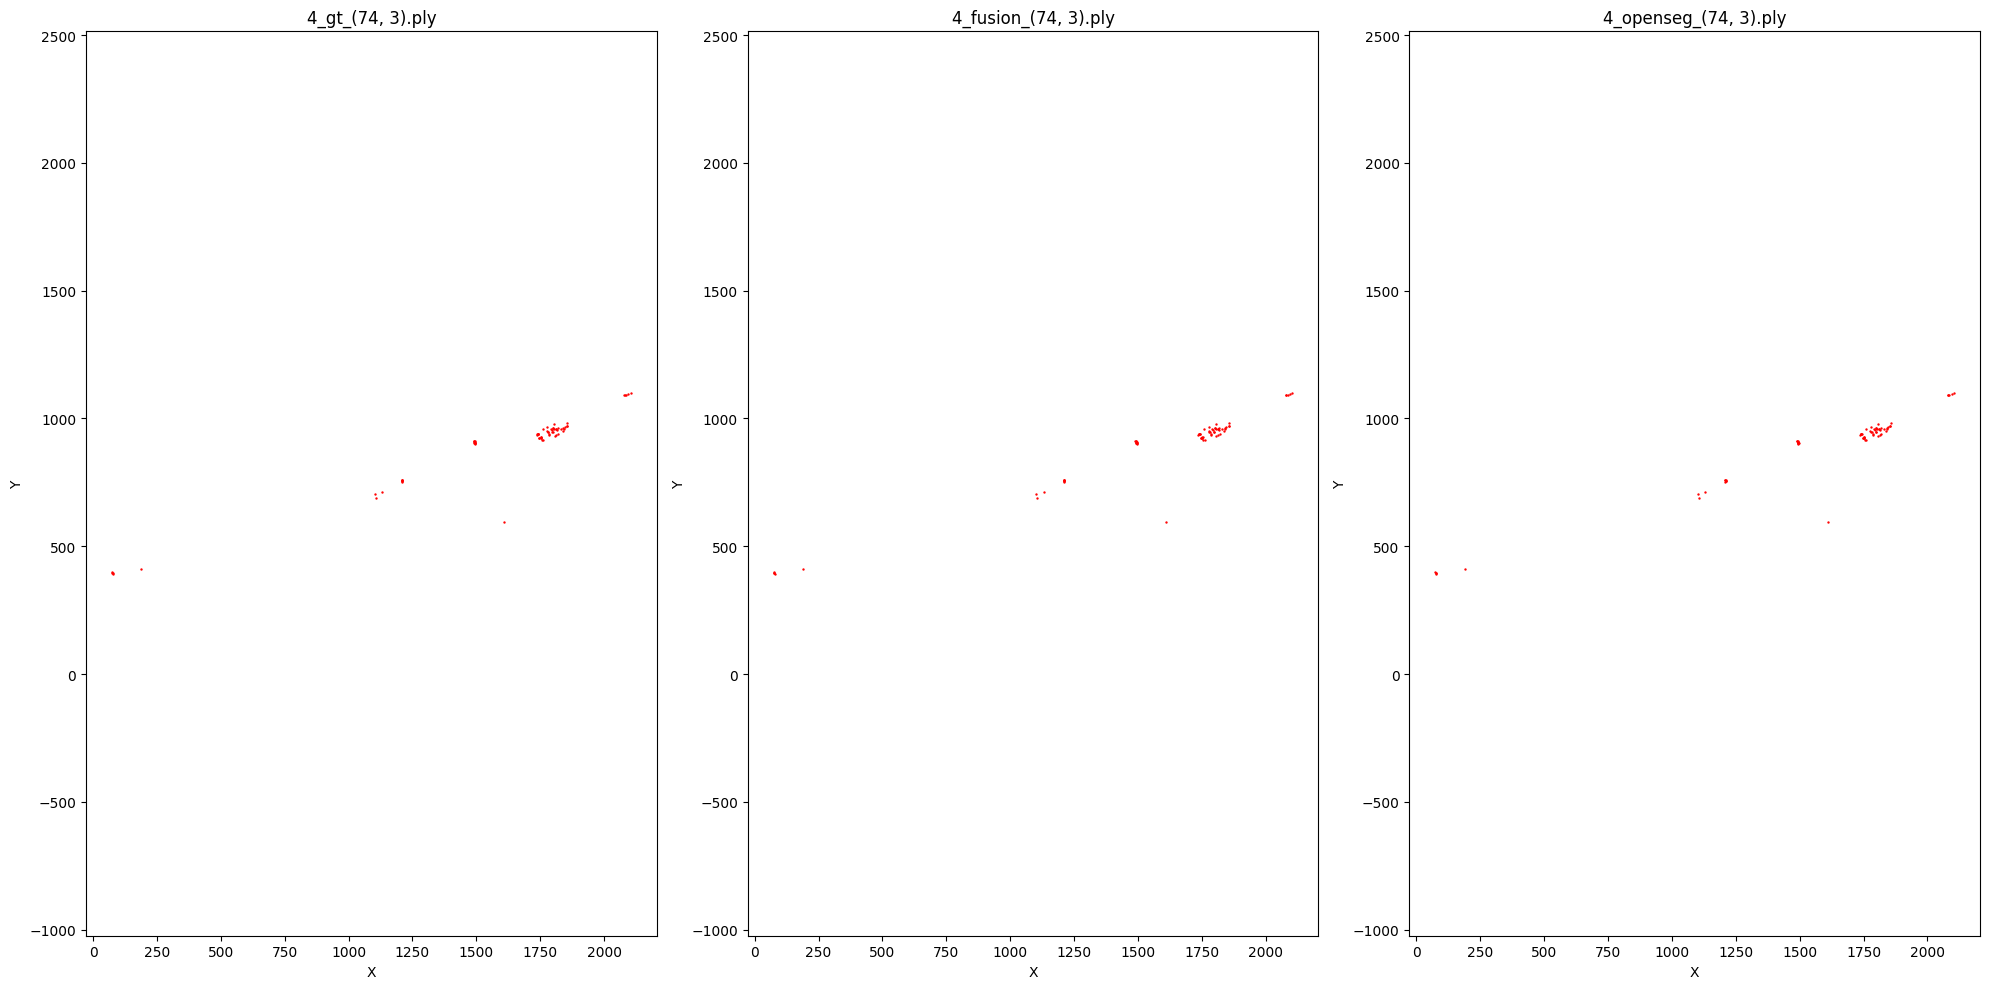

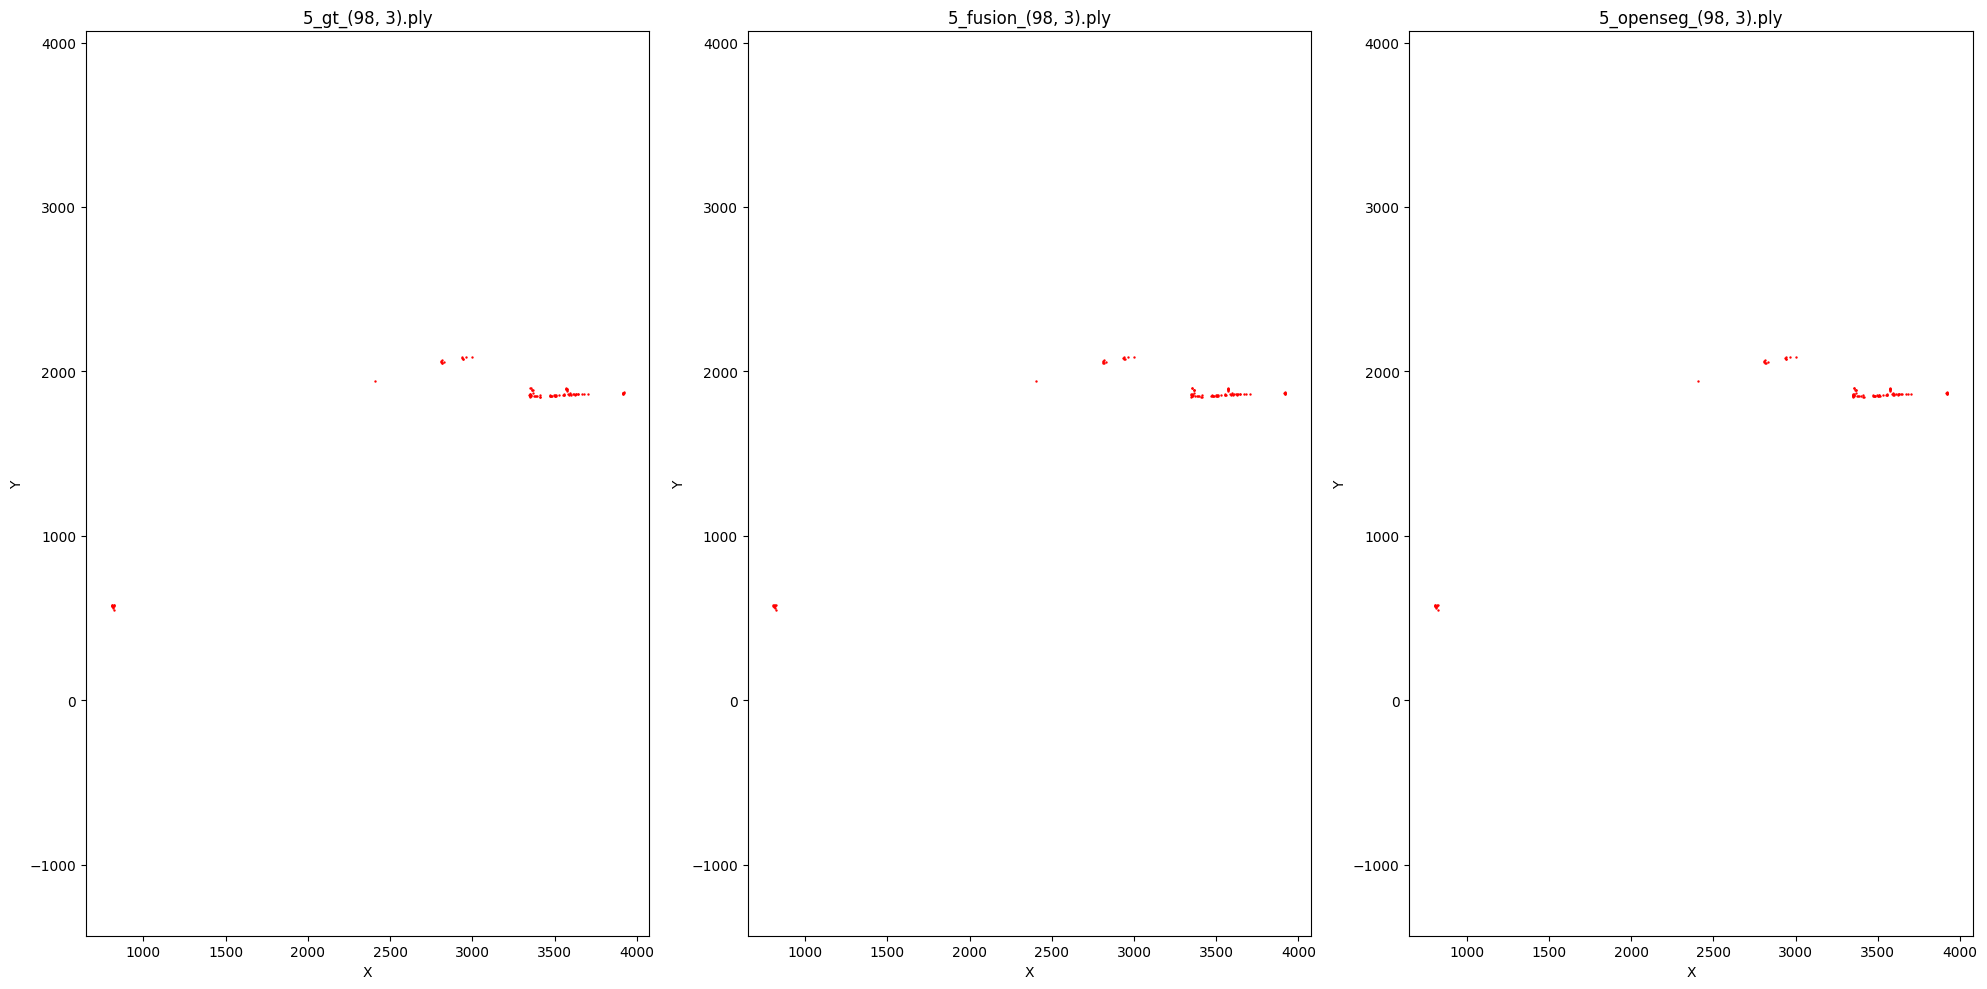

In [34]:
pred_path = "/home/daniel/spatial_understanding/benchmarks/openscene/experiments/distill/truckscenes_openseg/result/last"
gt_files = [os.path.join(pred_path, i) for i in os.listdir(pred_path) if "gt" in i]
pred_files = [os.path.join(pred_path, i) for i in os.listdir(pred_path) if "pred" in i]
openseg_files = [os.path.join(pred_path, i) for i in os.listdir(pred_path) if "openseg" in i]

gt_files = sorted(gt_files, key= lambda x: int(x.split("/")[-1].split(".")[0].split("_")[1]))
pred_files = sorted(pred_files, key= lambda x: int(x.split("/")[-1].split(".")[0].split("_")[1]))
openseg_files = sorted(openseg_files, key= lambda x: int(x.split("/")[-1].split(".")[0].split("_")[1]))

for i, (gt_ply_path, pred_ply_path, openseg_ply_path) in enumerate(zip(gt_files, pred_files, openseg_files)):
    # Load point clouds
    gt = o3d.io.read_point_cloud(gt_ply_path)
    pred = o3d.io.read_point_cloud(pred_ply_path)
    openseg = o3d.io.read_point_cloud(openseg_ply_path)

    gt_points = np.asarray(gt.points)
    gt_colors = np.asarray(gt.colors)
    
    pred_points = np.asarray(pred.points)
    pred_colors = np.asarray(pred.colors)

    openseg_points = np.asarray(openseg.points)
    openseg_colors = np.asarray(openseg.colors)

    
    # Create side-by-side plot
    fig, axes = plt.subplots(1, 3, figsize=(20, 10))

    # GT plot
    axes[0].scatter(gt_points[:, 0], gt_points[:, 1], c="r", s=0.5)
    axes[0].set_title(f"{i}_gt_{gt_points.shape}.ply")
    axes[0].axis("equal")
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
        

    # Fusion plot
    axes[1].scatter(pred_points[:, 0], pred_points[:, 1], c="r", s=0.5)
    axes[1].set_title(f"{i}_fusion_{pred_points.shape}.ply")
    axes[1].axis("equal")
    axes[1].set_xlabel("X")
    axes[1].set_ylabel("Y")
    
    # Fusion plot
    axes[2].scatter(openseg_points[:, 0], openseg_points[:, 1], c="r", s=0.5)
    axes[2].set_title(f"{i}_openseg_{openseg_points.shape}.ply")
    axes[2].axis("equal")
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Y")

    

    plt.tight_layout()
    plt.show()
